In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [10]:
# Create Database Connection
# ----------------------------------
# Establish Connection

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [12]:
# reflect an existing database into a new model
# reflect the tables

# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [14]:
# Assign the measurement class & station class to variables called `Measurement` & 'Station'
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create a session to link Python to database
session = Session(engine)

In [18]:
# Save references to Measurement table
measurement_df = pd.read_sql("SELECT * FROM Measurement", conn)

# print data frame 
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [20]:
engine.execute('select * FROM Measurement LIMIT 5' ).fetchall()



[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [22]:
# Save references to Station table
station_df = pd.read_sql("SELECT * FROM Station", conn)

# Print data frame
station_df.head(10)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [24]:
engine.execute('SELECT * FROM Station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [26]:
#use inspector to view classes in Measurement

inspector = inspect(engine)
columns = inspector.get_columns('Measurement')

for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [28]:
#use inspector to view classes in Station

inspector = inspect(engine)
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [30]:
measurement_count = session.query(Measurement).count()
print(measurement_count)

19550


In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data

percip_stats = measurement_df['prcp'].describe()
round(percip_stats, 3)

count    18103.000
mean         0.161
std          0.469
min          0.000
25%          0.000
50%          0.010
75%          0.110
max         11.530
Name: prcp, dtype: float64

In [34]:
# Convert date column to datetime 
measurement_df['date'] = pd.to_datetime(measurement_df['date'])

#Find most recent date in data set
recent_date = measurement_df['date'].max()
print(f"The most recent time stamp in the dataset is {recent_date}")
print('----')


# Calculate the date 1 year ago from the last data point in the database
recent_date_minus_one_year = recent_date - dt.timedelta(days=365)
print(f"The date of the start of the most recent 12 months is {recent_date_minus_one_year}.")

The most recent time stamp in the dataset is 2017-08-23 00:00:00
----
The date of the start of the most recent 12 months is 2016-08-23 00:00:00.


In [36]:
#Query to get percipitation data for last 12 months of dataset
sel = [Measurement.date,
      Measurement.prcp]

last_12_months_prcp = session.query(*sel).\
    filter(func.strftime(Measurement.date) > "2016-08-23").all()

#convert to a dataframe
last_12_df=pd.DataFrame(last_12_months_prcp)

# convert datetime
last_12_df['date'] = pd.to_datetime(last_12_df['date'])

## Ensure datatime format converted correctly
#last_12_df.info()

#print dataframe
last_12_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


Text(0.5, 1.02, '12 months of Daily Percipitation (8/24/2016-8/23/2017)')

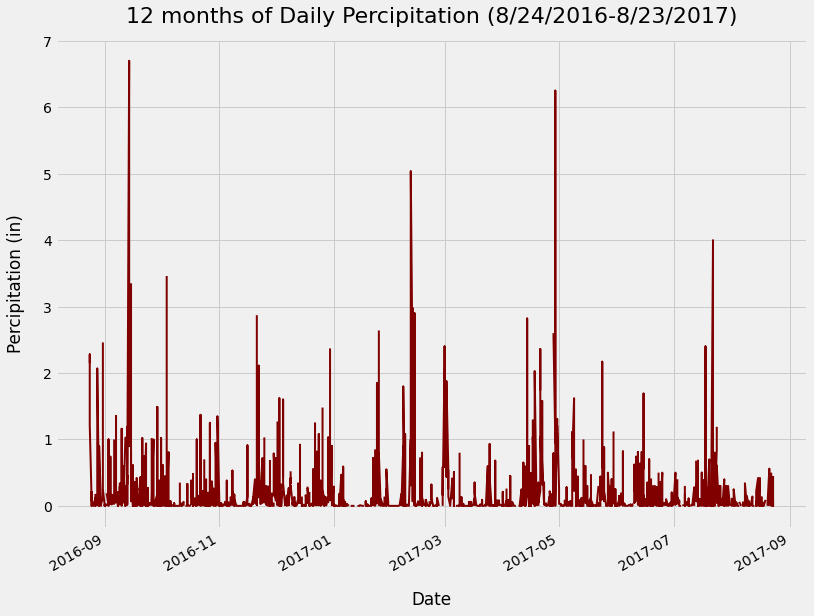

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data
#plot the last twelve months as a run chart
last_12_df.index
last_12_df.set_index('date')['prcp'].plot(figsize=(12,10), linewidth=2.0, color='maroon')
plt.xlabel("Date", labelpad=18)
plt.ylabel("Percipitation (in)", labelpad=18)
plt.title("12 months of Daily Percipitation (8/24/2016-8/23/2017)", y=1.02, fontsize = 22)


In [40]:
# print data frame 
# measurement_df.head()

In [42]:
# Design a query to show how many stations are available in this dataset?
station_observations = session.query(Measurement).group_by(Measurement.station).count()
print(f"The total number of stations in the dataset is {station_observations}.")

The total number of stations in the dataset is 9.


In [44]:
#Descriptive stats on observed temperature
tobs_stats = measurement_df['tobs'].describe()
round(tobs_stats, 3)

count    19550.000
mean        73.098
std          4.524
min         53.000
25%         70.000
50%         73.000
75%         76.000
max         87.000
Name: tobs, dtype: float64

In [46]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

station_anal_2 = measurement_df.groupby('station')['tobs'].agg([np.min, np.max, np.mean, np.count_nonzero])
sort_station_count = round(station_anal_2.sort_values(['count_nonzero'], ascending=False), 1)
sort_station_count

,amin,amax,mean,count_nonzero
station,,,,
USC00519281,54.0,85.0,71.7,2772.0
USC00519397,56.0,87.0,74.6,2724.0
USC00513117,59.0,85.0,72.7,2709.0
USC00519523,56.0,85.0,74.5,2669.0
USC00516128,58.0,84.0,70.9,2612.0
USC00514830,58.0,85.0,74.9,2202.0
USC00511918,53.0,87.0,71.6,1979.0
USC00517948,58.0,87.0,74.7,1372.0
USC00518838,58.0,83.0,72.7,511.0


In [48]:
# Choose the station with the highest number of temperature observations.

#Query to get percipitation data for last 12 months of dataset
sel_2 = [Measurement.date,
      Measurement.tobs]

hi_station_12mo_temp = session.query(*sel_2).\
    filter(func.strftime(Measurement.date) > "2016-08-23").\
    filter_by(station = 'USC00519281').all()

#convert to a dataframe
hi_station_temp_df =pd.DataFrame(hi_station_12mo_temp)

# convert datetime
hi_station_temp_df['date'] = pd.to_datetime(hi_station_temp_df['date'])

## Ensure datatime format converted correctly
# hi_station_temp_df.info()

#print dataframe
hi_station_temp_df.head()

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


Text(0.5, 1.015, 'Distribution of Temperature at Station USC00519281')

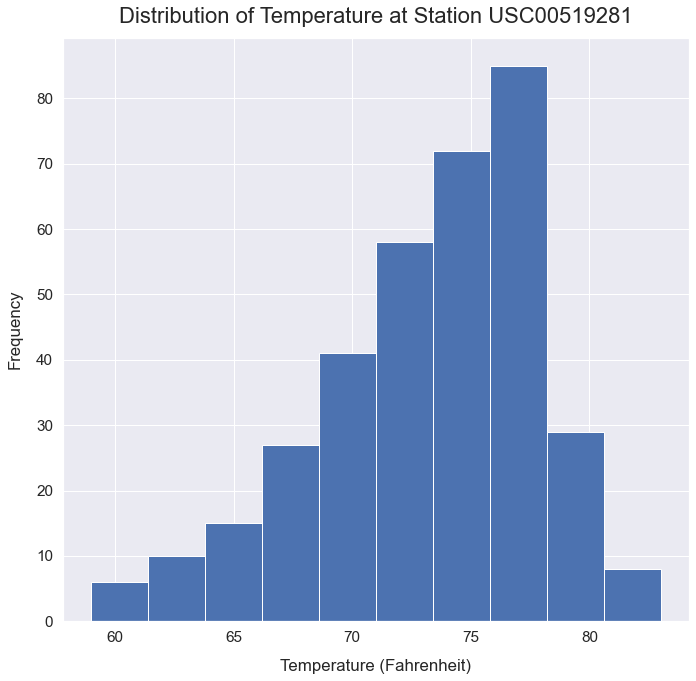

In [50]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sns.set(font_scale=1.4)
hi_station_temp_df['tobs'].plot(kind='hist', figsize=(10,10));
plt.xlabel("Temperature (Fahrenheit)", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Temperature at Station USC00519281", y=1.015, fontsize=22)


## Bonus Challenge Assignment

In [ ]:
#  Due to time did not attempt the bonus assignment

In [52]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [35]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [36]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [38]:
# Plot the daily normals as an area plot with `stacked=False`
